
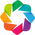

In [1]:
import holoviews as hv
import pandas as pd 
import numpy as np

from rnaseq_lib.utils import mkdir_p
from rnaseq_lib.plotting import tsne_of_dataset
from rnaseq_lib.tissues.plots import get_tcga_gtex_label_info

hv.extension('bokeh')

# Raw Expression

Plot raw expression data

In [8]:
df_path = '/mnt/rna-seq-analysis/data/xena/tcga_gtex_counts_protein_coding.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0)

In [9]:
info = get_tcga_gtex_label_info()

In [13]:
tsne_scatter = tsne_of_dataset(df[info['sample']].T, title='t-SNE of TCGA and GTEx Dataset', perplexity=50, learning_rate=750, plot_info=info)

In [14]:
%%opts Scatter [width=900 height=500 tools=['hover']] 
%%opts Scatter [color_index='tissue'] (cmap='tab20', size=5, alpha=0.5)
%%opts Scatter [legend_position='left' show_legend=True]
tsne_scatter

:Scatter   [x]   (y,sample,tissue,label)

# DESeq2 Normalization

Plot after DESeq2 normalization

In [ ]:
df_path = '/mnt/rna-seq-analysis/data/xena/deseq2_normalized_tcga_gtex_counts.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0)

In [ ]:
z = run_tsne(df.T, num_dims=2, perplexity=50, learning_rate=750)

In [ ]:
samples = return_samples()
info = defaultdict(list)
for tissue in sorted(samples):
    info['label'].extend(['Tumor' if x.endswith('-01') 
                           else 'Normal' if x.endswith('-11') 
                           else 'GTEx' for x in samples[tissue]])
    info['sample'].extend([x for x in samples[tissue]])
    info['tissue'].extend([tissue for _ in samples[tissue]])
info['x'] = z[:, 0]
info['y'] = z[:, 1]    

In [ ]:
deseq_scatter = hv.Scatter(pd.DataFrame.from_dict(info), 
                         kdims=['x'], 
                         vdims=['y', 'tissue', 'sample'], 
                         group='TCGA and GTEx')

In [ ]:
%%opts Scatter [width=900 height=500 tools=['hover']] 
%%opts Scatter [color_index='tissue'] (cmap='tab20', size=5, alpha=0.5)
%%opts Scatter [legend_position='left' show_legend=True]
deseq_scatter